In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CarRentalData.csv')
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [4]:
print(df.shape)
print(df.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(tabela)

(5851, 15)
0


,Unique,Null,NullPercent,Type
fuelType,4,75,0.012818,object
rating,80,501,0.085626,float64
renterTripsTaken,238,0,0.000000,int64
reviewCount,203,0,0.000000,int64
location.city,971,0,0.000000,object
location.country,1,0,0.000000,object
location.latitude,5839,0,0.000000,float64
location.longitude,5834,0,0.000000,float64
location.state,46,0,0.000000,object
owner.id,3093,0,0.000000,int64


In [5]:
df.drop_duplicates(inplace=True)
print('ok')

ok


In [6]:
cat = df.select_dtypes(include='O')
cat

,fuelType,location.city,location.country,location.state,vehicle.make,vehicle.model,vehicle.type
0,ELECTRIC,Seattle,US,WA,Tesla,Model X,suv
1,ELECTRIC,Tijeras,US,NM,Tesla,Model X,suv
2,HYBRID,Albuquerque,US,NM,Toyota,Prius,car
3,GASOLINE,Albuquerque,US,NM,Ford,Mustang,car
4,GASOLINE,Albuquerque,US,NM,Chrysler,Sebring,car
...,...,...,...,...,...,...,...
5846,GASOLINE,Honolulu,US,HI,Chevrolet,Cruze,car
5847,HYBRID,Aiea,US,HI,Lexus,HS 250h,car
5848,GASOLINE,Kailua,US,HI,smart,fortwo,car
5849,GASOLINE,Waipahu,US,HI,GMC,Savana,van


In [7]:
num = df.select_dtypes(exclude='O')
num

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
0,5.00,13,12,47.449107,-122.308841,12847615,135,2019
1,5.00,2,1,35.111060,-106.276551,15621242,190,2018
2,4.92,28,24,35.127163,-106.566681,10199256,35,2012
3,5.00,21,20,35.149726,-106.711425,9365496,75,2018
4,5.00,3,1,35.208659,-106.601008,3553565,47,2010
...,...,...,...,...,...,...,...,...
5846,5.00,32,27,21.292950,-157.836856,9794111,33,2017
5847,5.00,17,16,21.375507,-157.914919,2754690,49,2010
5848,4.94,18,17,21.378719,-157.727816,11313508,35,2013
5849,NaN,1,0,21.376105,-158.020237,4209883,77,2015


In [8]:
df['fuelType'] = df['fuelType'].fillna('Unknow')
print('done')

done


In [9]:
df.drop('location.country',axis=1, inplace=True)
df.dropna(inplace=True)
print('done')

done


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5850
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5350 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5350 non-null   int64  
 3   reviewCount         5350 non-null   int64  
 4   location.city       5350 non-null   object 
 5   location.latitude   5350 non-null   float64
 6   location.longitude  5350 non-null   float64
 7   location.state      5350 non-null   object 
 8   owner.id            5350 non-null   int64  
 9   rate.daily          5350 non-null   int64  
 10  vehicle.make        5350 non-null   object 
 11  vehicle.model       5350 non-null   object 
 12  vehicle.type        5350 non-null   object 
 13  vehicle.year        5350 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 627.0+ KB


In [11]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


<Axes: >

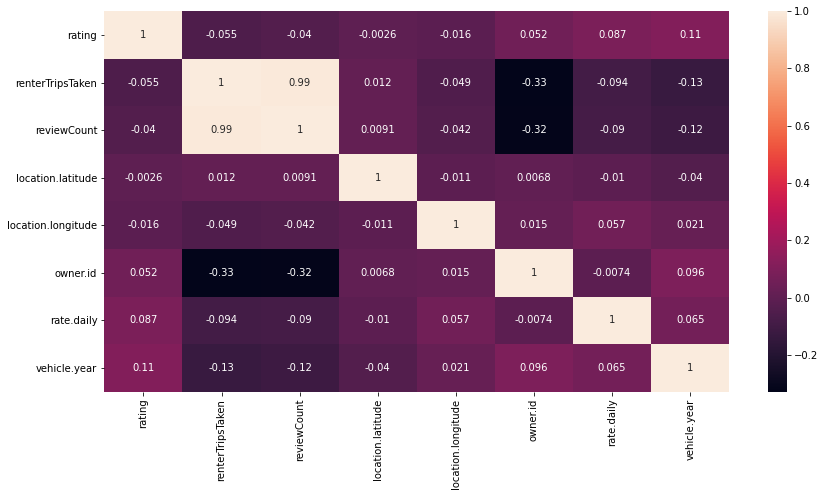

In [12]:
#EDA
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

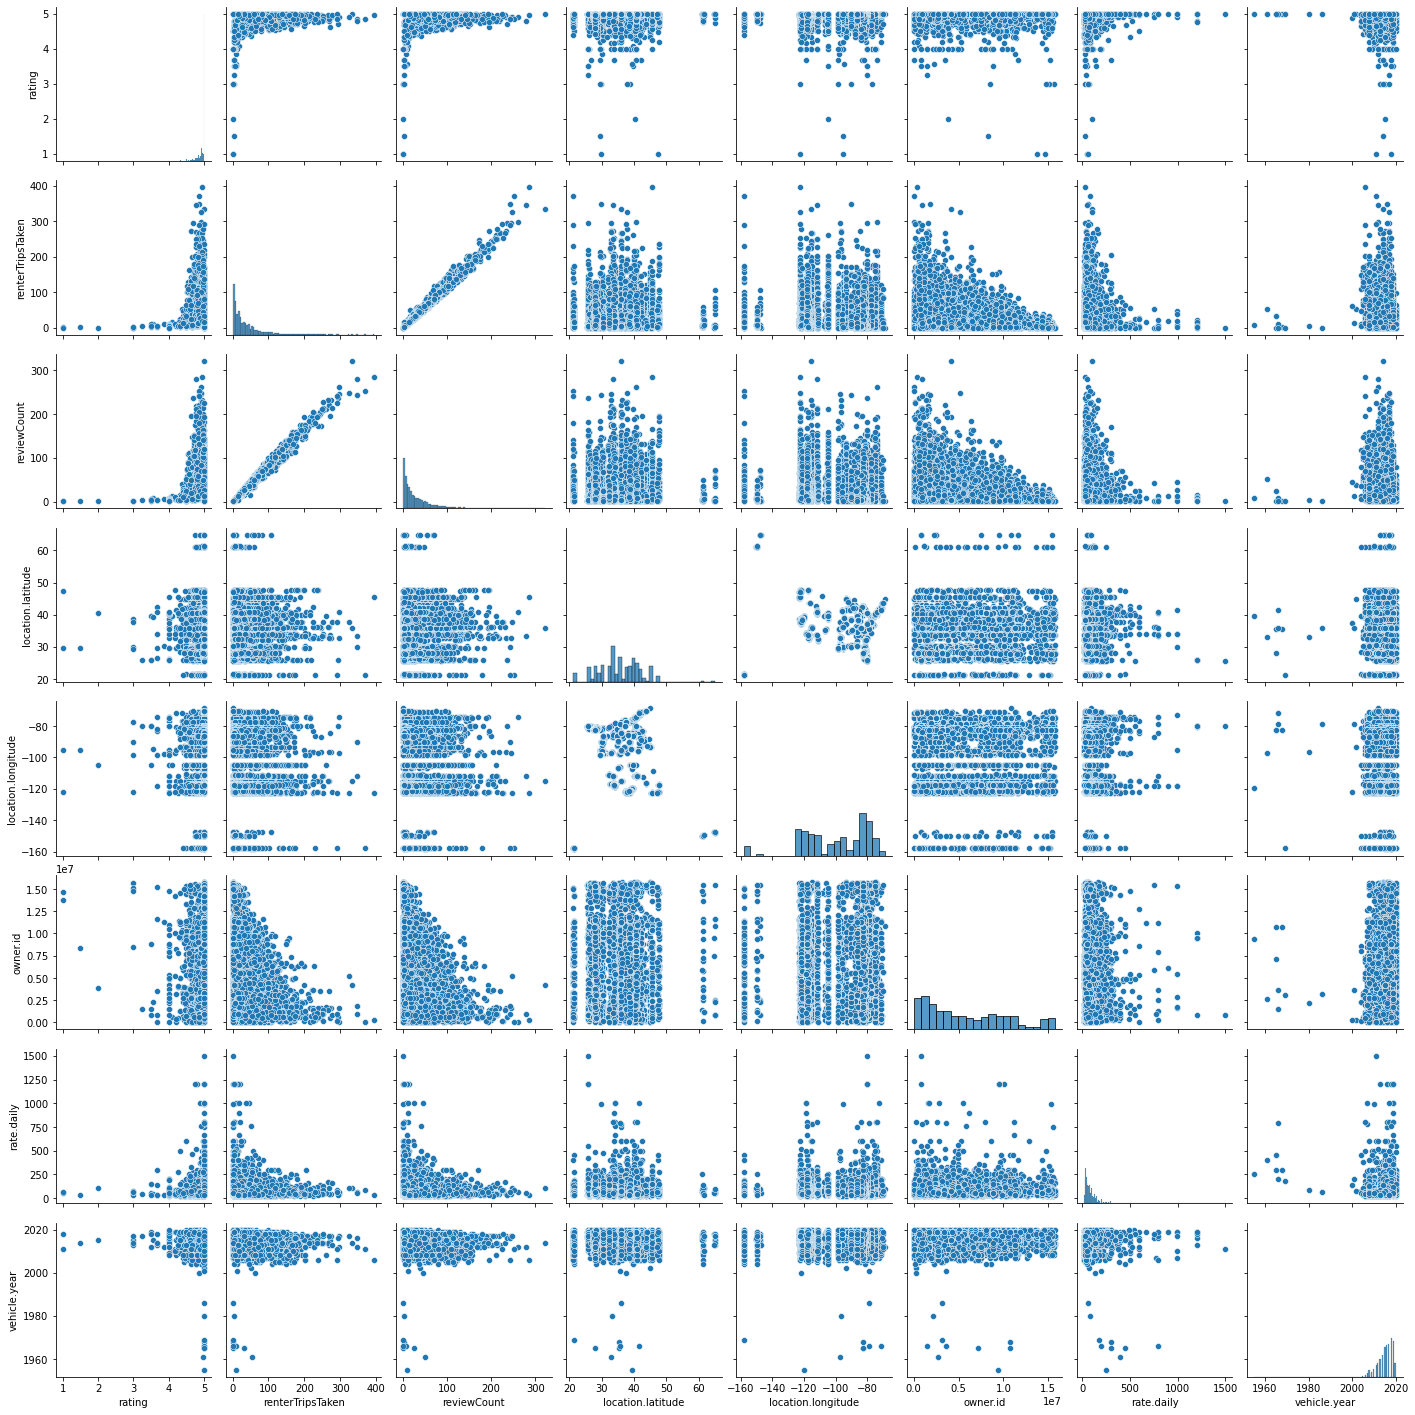

In [13]:
sns.pairplot(df)

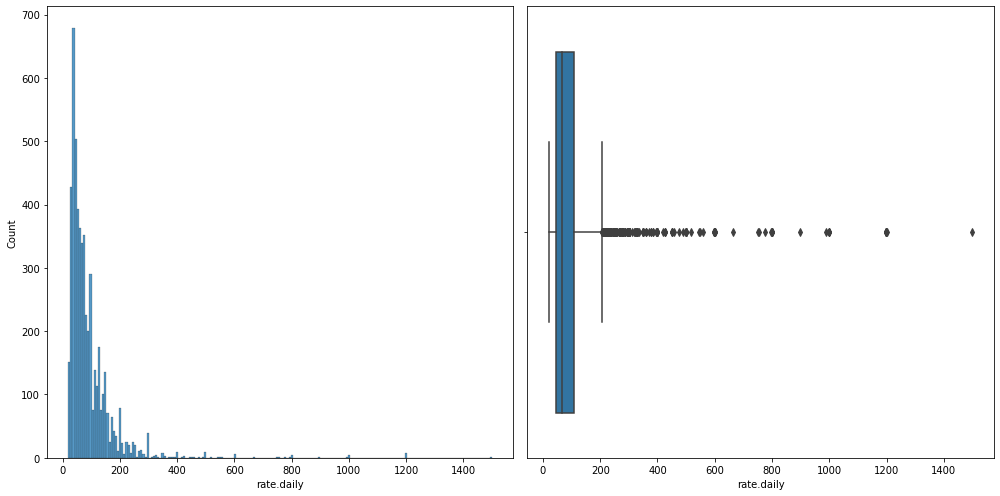

In [14]:
fig, axes = plt.subplots(1,2, figsize=(14,7))
sns.histplot(x=df['rate.daily'], ax=axes[0])
sns.boxplot(x=df['rate.daily'], ax=axes[1])

plt.tight_layout()
plt.show()

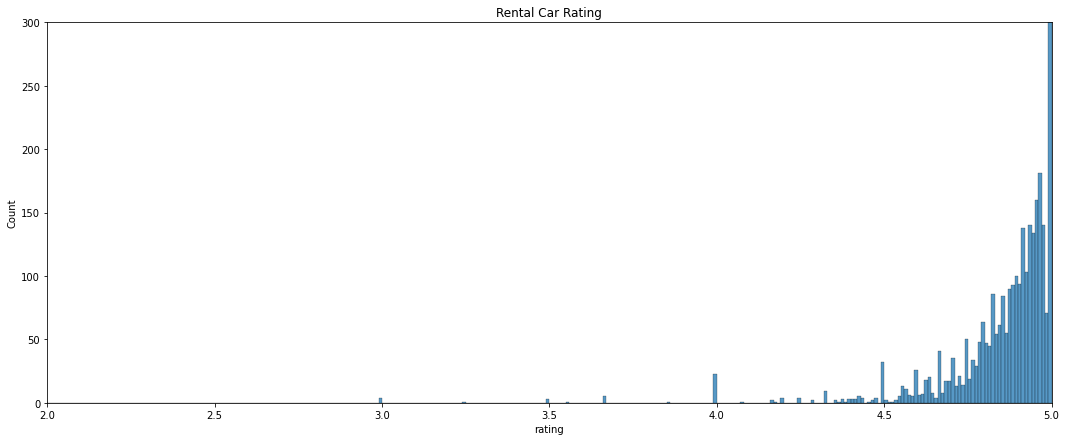

<Figure size 432x288 with 0 Axes>

In [15]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=df, x="rating", binwidth=.01)
ax.set_ylim(0,300)
ax.set_xlim(2,5)
plt.title('Rental Car Rating')
plt.show()
plt.savefig('Rental Car Rating.png', format='png')

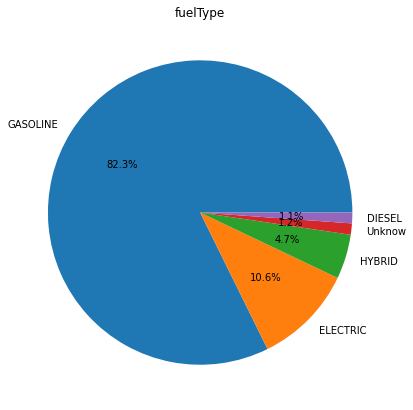

<Figure size 432x288 with 0 Axes>

In [16]:
labels=df['fuelType'].value_counts().index
values=df['fuelType'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('fuelType')
plt.show()
plt.savefig('Fuel Type.png', format='png')

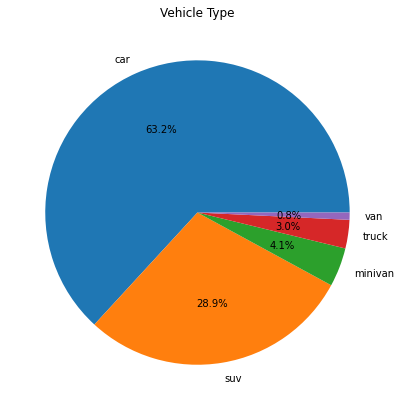

<Figure size 432x288 with 0 Axes>

In [17]:
labels=df['vehicle.type'].value_counts().index
values=df['vehicle.type'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('Vehicle Type')
plt.show()
plt.savefig('Vehicle Type.png', format='png')

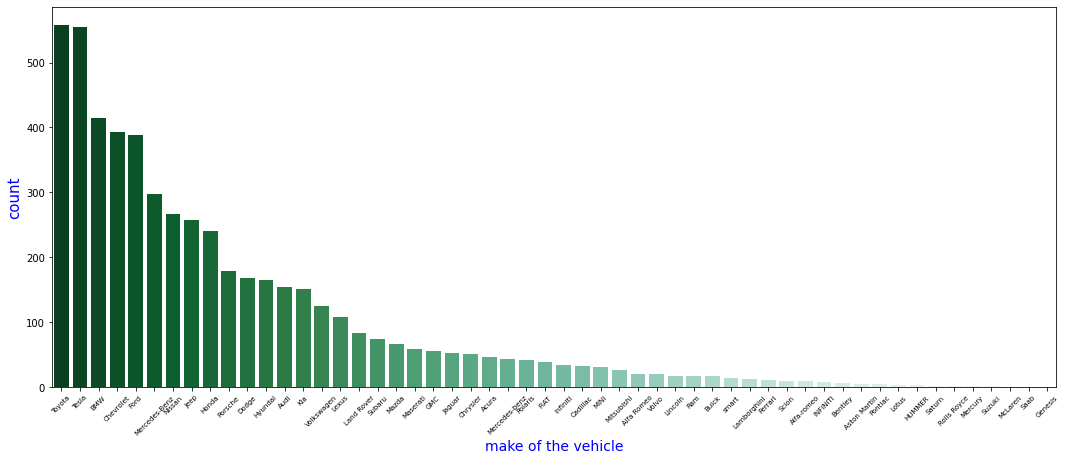

In [18]:
labels=df['vehicle.make'].value_counts().index
f, ax = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.make', data=df,
              order = labels,
              #hue='vehicle.year'
              palette="BuGn_r"
           )
plt.xticks(rotation= 45,fontsize=7 )
ax.set_ylabel('count', fontsize=15, color='b')
ax.set_xlabel('make of the vehicle', fontsize=14, color='b')
#plt.savefig('make of the vehicle.png', format='png')
plt.savefig('myimage.svg', format='svg', dpi=1200)

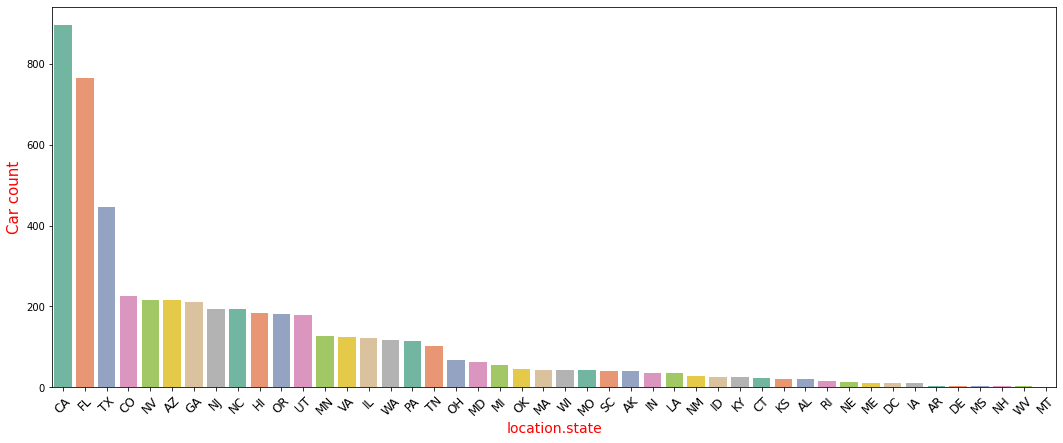

In [19]:
labels=df['location.state'].value_counts().index
f, ax = plt.subplots(figsize=(18, 7))
sns.countplot(x='location.state', data=df,
              order = labels,
              #hue='vehicle.year'
              palette="Set2"
           )
plt.xticks(rotation= 45,fontsize=12 )
ax.set_ylabel('Car count', fontsize=15, color='r')
ax.set_xlabel('location.state', fontsize=14, color='r')
#plt.savefig('make of the vehicle.png', format='png')
plt.savefig('Car count per state', format='svg', dpi=1200)

In [20]:
from IPython.display import IFrame
IFrame('https://datastudio.google.com/embed/reporting/6ddc4bc8-e881-4983-a37f-51e057485122/page/OFP8B', width='100%', height=900)